Loading all the necessary libraries for loading, exploring, and modeling the data.

In [18]:
#Data manipulation libraries
import numpy as np
import pandas as pd
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Data transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
#Data modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Data evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
# Data import, kindly put the correct directory
dataset = pd.read_csv("data/features_30_sec.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/features_30_sec.csv'

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prp

In [21]:
dataset = pd.read_csv("features_30_sec.csv")

In [22]:
#Overview
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [23]:
#Dimentionality
dataset.shape

(1000, 60)

In [24]:
#Check for NA
dataset.isna().sum()
dataset = dataset.dropna() #discard

#Delete filename
dataset = dataset.drop('filename', axis=1)
dataset.shape

(1000, 59)

Text(0, 0.5, 'Value')

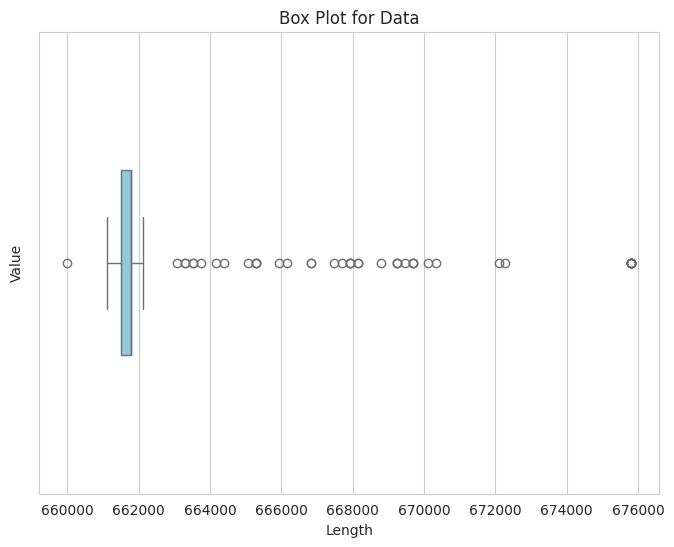

In [25]:
plt.figure(figsize=(8, 6))  #figure size

# box plot
sns.set_style("whitegrid")  
sns.boxplot(x='length', data=dataset, color='skyblue', width=0.4)
plt.title('Box Plot for Data') 
plt.xlabel('Length')  
plt.ylabel('Value')  

In [26]:
# creating X ?
dataset = dataset.drop('length', axis=1)
dataset.shape

(1000, 58)

In [27]:
#Statistical discriptors for each feature
dataset.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,2.555262e+06,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,8.660900e+06,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


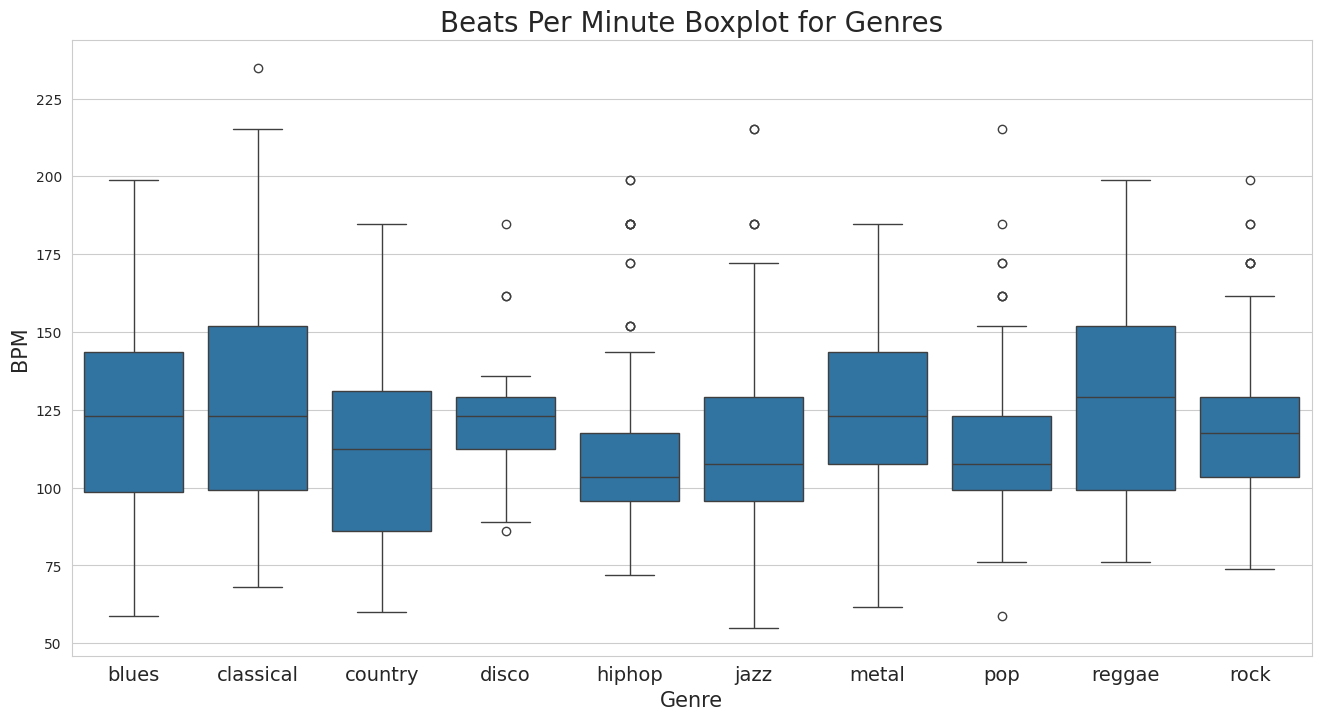

In [28]:
# A box plot to show the distribution of music pieces in different genres in different tempo/beats per minute values.
x = dataset[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x);

plt.title('Beats Per Minute Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

In [34]:
encoder = prp.LabelEncoder()
X = dataset.drop("label", axis = 1)
y = encoder.fit_transform(dataset["label"])

We are dividing the dataset to separate the labels from the features. The features are stored in the 'X' variable, while the string labels are stored in the 'y' variable.

In [ ]:
X = dataset.iloc[:,:-1] #features
y = dataset.iloc[:,-1] #labels

To prepare the dataset for PCA, we need to transform it to make it more uniform. As seen in the summary statistics above, each feature has its own spread, minimum, maximum, and variance, which makes it challenging to extract information from multidimensional data. To address this issue, we will scale the descriptive features using a Standard Scaler available in the sklearn.preprocessing package. This scaler function transforms each column in such a way that they have a mean of 0 and a standard deviation of 1.

For the classification task, it's also crucial to encode the labeled data with numerical values. This is performed below using the LabelEncoder() function from the same package. When a model classifies data, it provides numerical output. Therefore, having a string array to compare with numerical output can lead to errors.

The scaled features are shown below, and you can observe how all values are now spread across the range of -1 to 1.

In [ ]:
#Standard Scaler to transform X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels in y with numeric values
y_encoded = label_encoder.fit_transform(y)

#Display scaled features
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df.head()

Now, we apply PCA transformation to our scaled feature data. Setting n_components to 2 means that PCA will reduce the dimensionality of the dataset by retaining the two most significant principal components. These two components capture the maximum variance in the data, providing a simplified representation of the dataset while preserving as much relevant information as possible.

In [ ]:
#PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

The code below provides the explained variance value for each of the principal components. A higher value indicates that the component has captured more information about the data's variation. For both components, the explained variance is around 0.2, indicating that each component accounts for only 20% of the variation in the data. This reveals that using PCA may result in a significant loss of information, regardless of dimensionality reduction. We will explore other techniques and methods to address this issue when finalizing the model later.

In [ ]:
#Calculating ecplained variance as part of PCA evaluation.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

The code below plots both the principal components for each class, and we can observe a significant overlap of data points from different genres. The PCA visualization does not provide a clear separation between classes, which may not be ideal for our purposes. As an alternative, we might consider using the original scaled dataset for our model. In later stages, we can explore feature selection techniques to reduce dimensionality and computational complexity.

In [ ]:
#Plot of principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()

In [35]:
#Train-test split
test_size = 0.20
seed = 101 #for randomization of split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [36]:
scaler = prp.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
target = pd.DataFrame()

In [107]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Data evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [108]:
#List of models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) #Logistic Regression
models.append(('KNN', KNeighborsClassifier()))                                   #K-Nearest Neighbor
models.append(('SVM', SVC(gamma='auto')))                                        #Support Vector Machine
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=7)))  #Random Forest

In [115]:
results = [] #store accuracy score for each model
names = [] #name of the corresponding model
for name, model in models:
    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    target.loc[name, "Accuracy"] = cv_results.mean()
    results.append(cv_results)
    names.append(name)

In [117]:
for name, model in models:
    kfold = KFold(n_splits=5, random_state = seed, shuffle = True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = "accuracy")
    target.loc[f"{name}_scaled", "Accuracy"] = cv_results.mean()
    results.append(cv_results)
    names.append(f"{name}_scaled")

In [ ]:
# Make predictions on validation dataset
#Logistic Regression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Make predictions on validation dataset
# K-Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Make predictions on validation dataset
# Support Vector Machine
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Make predictions on validation dataset
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=7)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [119]:
target

,Accuracy
LR,0.51750
KNN,0.23250
SVM,0.08625
RF,0.70125
LR_scaled,0.68125
KNN_scaled,0.64000
SVM_scaled,0.69875
RF_scaled,0.69625


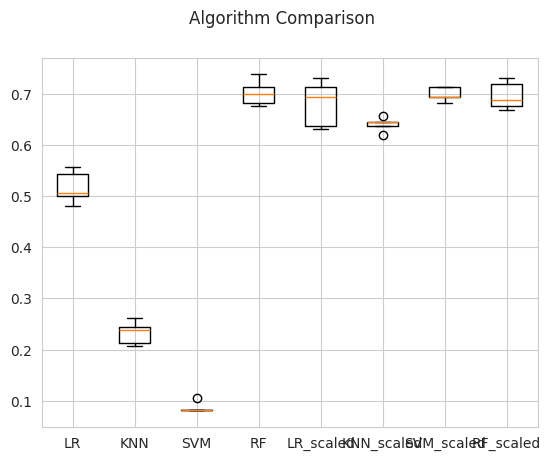

In [120]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xtick
ax.set_xticklabels(names)
plt.show()